In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os
import numpy as np
import datetime

### Preparaçao dos dados

In [2]:
df = pd.read_csv('./data/train.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#para trabalhar com datetime, os índices precisam ser as próprias datas
df = pd.read_csv('./data/train.csv', parse_dates=['datetime'], index_col=0)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [5]:
df.drop(columns=['season', 'holiday','workingday','weather','temp','atemp', 'humidity','windspeed','casual', 'registered'], axis=1, inplace = True)
df.head()

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1


In [6]:
df = df.groupby(pd.Grouper(freq = 'D')).sum() #frequência diária]
df.head()

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


In [7]:
# a base de teste é composta de todos os registros
df_test = df.copy()
df_test.shape

(719, 1)

In [8]:
# a base de treino será composta por menos registros
df_train = df.iloc[0:689,:]
df_train.shape

(689, 1)

In [9]:
df_train.index.min(), df_train.index.max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-11-19 00:00:00'))

In [10]:
df_test.index.min(), df_test.index.max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 00:00:00'))

In [11]:
dt_initial_date = pd.Timestamp("2011-01-01")
dt_final_date = pd.Timestamp("2012-11-19")
dt_max_prev = pd.Timestamp("2012-12-19")

train = (dt_initial_date, dt_final_date)
test = (dt_initial_date, dt_max_prev)

In [12]:
training_time_series = []
test_time_series = []

training_time_series.append(df_train[train[0]:train[1]]['count'])
test_time_series.append(df_test[test[0]:test[1]]['count'])

In [13]:
def encode_target(ts):
    return [x if np.isfinite(x) else "NaN" for x in ts]

In [14]:
encode_target(training_time_series[0][0:25])

[985,
 801,
 1349,
 1562,
 1600,
 1606,
 1510,
 959,
 822,
 1321,
 1263,
 1162,
 1406,
 1421,
 1248,
 1204,
 1000,
 683,
 1650,
 0,
 0,
 0,
 0,
 0,
 0]

In [15]:
def series_to_obj(ts):
    obj = {"start": str(ts.index[0]), "target": encode_target(ts)}
    return obj

In [16]:
series_to_obj(training_time_series[0][0:5])

{'start': '2011-01-01 00:00:00', 'target': [985, 801, 1349, 1562, 1600]}

In [17]:
def series_to_jsonline(ts):
    return json.dumps(series_to_obj(ts))

In [18]:
series_to_jsonline(training_time_series[0][0:5])

'{"start": "2011-01-01 00:00:00", "target": [985, 801, 1349, 1562, 1600]}'

In [19]:
encoding = 'utf-8'
train_file = 'train.json'
test_file = 'test.json'
with open(train_file, 'wb') as fp:
    for ts in training_time_series:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

with open(test_file, 'wb') as fp:
    for ts in test_time_series:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

### Configuração do SageMaker

In [20]:
import boto3
import sagemaker

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [21]:
session = sagemaker.Session()
role = sagemaker.get_execution_role()
job_name = 'deepar-bike'
bucket = 'aws-sagemaker-course-633'
subdir_dataset = 'datasets/bike'
subdir = 'models/bike/deepar'
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, subdir_dataset, 'train.json')
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, subdir_dataset, 'test.json')
output_location = 's3://{}/{}/output'.format(bucket, subdir)

In [22]:
def write_s3(file, bucket, name):
    with open(file, 'rb') as f:
        return boto3.Session().resource('s3').Bucket(bucket).Object(name).upload_fileobj(f)

In [23]:
write_s3('train.json', bucket, os.path.join(subdir_dataset, 'train', 'train.json'))
write_s3('test.json', bucket, os.path.join(subdir_dataset, 'test', 'test.json'))

In [24]:
print(os.path.join(subdir_dataset, 'train', 'train.json'))
print(os.path.join(subdir_dataset, 'test', 'test.json'))

datasets/bike/train/train.json
datasets/bike/test/test.json


### Treinamento do DeepAR

In [25]:
container = sagemaker.image_uris.retrieve(framework='forecasting-deepar', region=boto3.Session().region_name)

In [27]:
deepar = sagemaker.estimator.Estimator(image_uri=container,
                                      role=role,
                                      instance_count=1,
                                      instance_type='ml.m5.large',
                                      output_path=output_location,
                                      sagemaker_session=session,
                                      base_job_name=job_name,
                                      use_spot_instances=True,
                                      max_run=3600,
                                      max_wait=3600) #se após esse tempo o treinamento não for concluído, ele é encerrado

In [28]:
time_freq = 'D'
prediction_length = 30
context_length = 30
epochs = 20

In [30]:
hyperparameters = {
    'time_freq': time_freq,
    'epochs': epochs,
    'context_length': str(context_length),
    'prediction_length': str(prediction_length)
}

In [31]:
deepar.set_hyperparameters(**hyperparameters)

In [32]:
data_channels = {'train': s3_train_data, 'test': s3_test_data}

In [33]:
deepar.fit(inputs = data_channels)

INFO:sagemaker:Creating training-job with name: deepar-bike-2025-01-10-11-05-12-116


2025-01-10 11:05:12 Starting - Starting the training job...
2025-01-10 11:05:35 Starting - Preparing the instances for training...
2025-01-10 11:06:05 Downloading - Downloading input data...
2025-01-10 11:06:35 Downloading - Downloading the training image...............
2025-01-10 11:09:07 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
Running custom environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
[01/10/2025 11:09:12 INFO 139818025748288] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'_kvstore': 'auto', '_num_gpus': 'auto', '_num_kv_servers': 'auto', '_tuning_objective_metric': '', 'cardinality': 'auto', 'dropout_rate': '0.10', 'early_stopping_patience': '

### Deploy e previsões

In [34]:
job_name = deepar.latest_training_job.name
print('Job name: ', job_name)

Job name:  deepar-bike-2025-01-10-11-05-12-116


In [35]:
endpoint = session.endpoint_from_job(job_name = job_name,
                                    initial_instance_count=1,
                                    instance_type='ml.m5.large',
                                    image_uri=container,
                                    role=role)

INFO:sagemaker:Creating model with name: deepar-bike-2025-01-10-11-05-12-116
INFO:sagemaker:Creating endpoint-config with name deepar-bike-2025-01-10-11-05-12-116
INFO:sagemaker:Creating endpoint with name deepar-bike-2025-01-10-11-05-12-116


--------!

In [36]:
print('Endpoint: ', endpoint)

Endpoint:  deepar-bike-2025-01-10-11-05-12-116


In [37]:
class DeepARPredictor(sagemaker.predictor.Predictor):

    def set_prediction_parameters(self, freq, prediction_length):
        """Set the time frequency and prediction length parameters. 
          This method **must** be called before being able to use `predict`.
        
        Parameters:
        freq -- string indicating the time frequency
        prediction_length -- integer, number of predicted time points
        
        Return value: none.
        """
        self.freq = freq
        self.prediction_length = prediction_length
        
    def predict(self, ts, cat=None, dynamic_feat=None, 
                encoding="utf-8", num_samples=100, quantiles=["0.1", "0.5", "0.9"]):
        """Requests the prediction of for the time series listed in `ts`, 
           each with the (optional) corresponding category listed in `cat`.
        
        Parameters:
        ts -- list of `pandas.Series` objects, the time series to predict
        cat -- list of integers (default: None)
        encoding -- string, encoding to use for the request (default: "utf-8")
        num_samples -- integer, number of samples to compute at prediction time (default: 100)
        quantiles -- list of strings specifying the quantiles to compute (default: ["0.1", "0.5", "0.9"])
        
        Return value: list of `pandas.DataFrame` objects, each containing the predictions
        """
        prediction_times = [x.index[-1] + datetime.timedelta(hours=1) for x in ts] 
        
        req = self.__encode_request(ts, cat, dynamic_feat, encoding, num_samples, quantiles)
        res = super(DeepARPredictor, self).predict(req)
        return self.__decode_response(res, prediction_times, encoding)
    
    def __encode_request(self, ts, cat, dynamic_feat, encoding, num_samples, quantiles):
        
        instances = [series_to_obj(ts[k]) for k in range(len(ts))]
        
        configuration = {"num_samples": num_samples, "output_types": ["quantiles"], "quantiles": quantiles}
        http_request_data = {"instances": instances, "configuration": configuration}
        return json.dumps(http_request_data).encode(encoding)
    
    def __decode_response(self, response, prediction_times, encoding):
        response_data = json.loads(response.decode(encoding))
        list_of_df = []
        for k in range(len(prediction_times)):
            prediction_index = pd.date_range(start=prediction_times[k], freq=self.freq, periods=self.prediction_length)
            list_of_df.append(pd.DataFrame(data=response_data['predictions'][k]['quantiles'], index=prediction_index))
        return list_of_df

In [39]:
predictor = DeepARPredictor(endpoint_name='deepar-bike-2025-01-10-11-05-12-116',
                           sagemaker_session=session)
predictor.set_prediction_parameters(time_freq, prediction_length)
predictor.serializer.content_type = 'application/json'

In [42]:
previsions = predictor.predict(training_time_series)

In [44]:
previsions

[                             0.1          0.5          0.9
 2012-11-19 01:00:00   -45.119568   937.230774  1868.121704
 2012-11-20 01:00:00  -476.939575    85.442764   576.036804
 2012-11-21 01:00:00  -837.428345  -315.958130   279.133789
 2012-11-22 01:00:00  -554.868835   -75.794647   356.453247
 2012-11-23 01:00:00  -416.060120   -50.805313   228.427841
 2012-11-24 01:00:00  -354.909973   -69.593712   285.551056
 2012-11-25 01:00:00  -256.573547    64.779175   397.313538
 2012-11-26 01:00:00  -247.697021    11.533298   351.635376
 2012-11-27 01:00:00  -676.537781   -83.863564   307.514679
 2012-11-28 01:00:00  -537.085754  -109.417656   459.190643
 2012-11-29 01:00:00   104.982941   574.327454  1155.970215
 2012-11-30 01:00:00  1533.229736  2433.043457  3311.469482
 2012-12-01 01:00:00  3691.087402  4527.941895  5660.712891
 2012-12-02 01:00:00  4501.248535  5682.468750  6911.453125
 2012-12-03 01:00:00  4727.034668  6329.863281  7378.982910
 2012-12-04 01:00:00  4425.099121  5723.

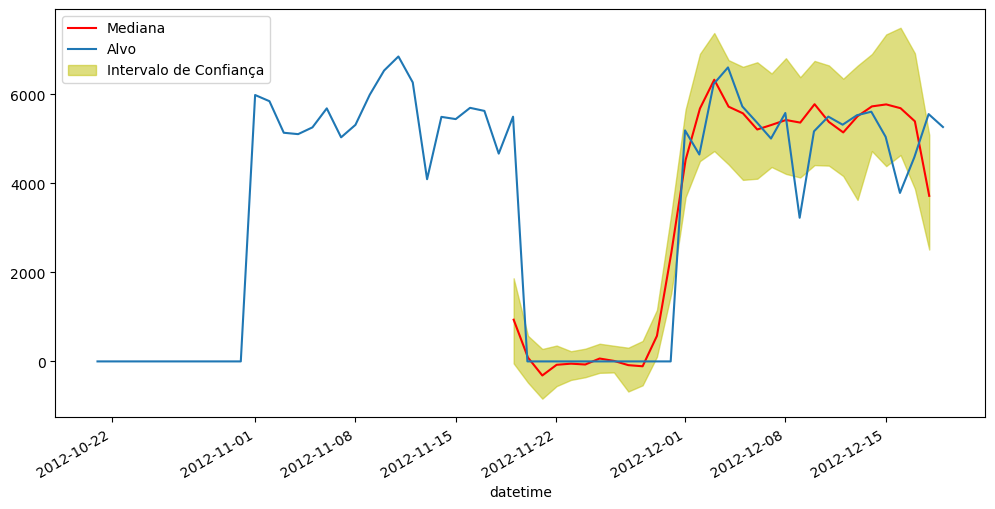

In [51]:
for k in range(len(previsions)):
    plt.figure(figsize=(12,6))
    previsions[k]['0.5'].plot(label='Mediana', color='red')
    test_time_series[k][-prediction_length - context_length:].plot(label='Alvo')
    p10 = previsions[k]['0.1']
    p90 = previsions[k]['0.9']
    plt.fill_between(p10.index, p10, p90, color='y', alpha=0.5, label='Intervalo de Confiança')
    plt.legend()
    plt.show()